# Worksheet 19

Name: Mohit Sai Gutha 
UID: U48519832

Name: Sri Harsha Kotamraju 
UID: U57771922

Name: Hrishav Varma 
UID: U57996211

Name: Arunesh Kumar Lal 
UID: U26502933

Name: Ria Singh 
UID: U21576658

Name: Pranav Goyanka 
UID: U18853014

Name: Sonja Poe 
UID: U15566089


### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9947345064026111
0.9947422266957479
0.9947468751781456
0.9948409959317409
0.9949039828222338
0.9949073519158783
0.9949076682803445
0.9949478063896198
0.9949490807096396
0.9950151960121439
0.9950152495988087
0.9951078404180392
0.9951138770360923
0.9950373885998793


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3124999999999998
[1, 0, 0, 0, 0]
0.15624999999999997


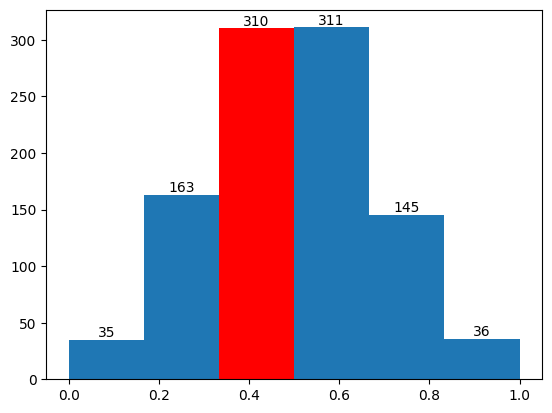

In [3]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

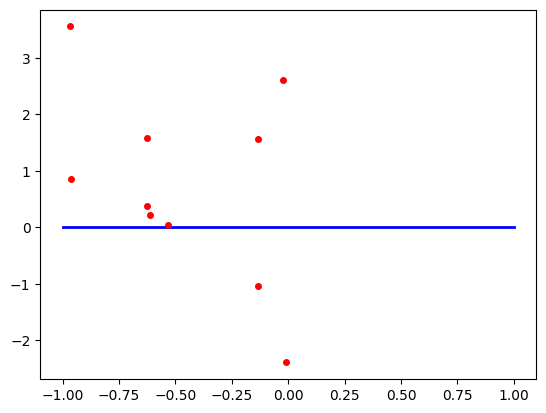

In [39]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
y = 1.0 + 1.0 * np.random.randn(SAMPLE_SIZE)

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.array([0.0, 0.0])

xplot = np.linspace(-1, 1, SAMPLE_SIZE)
yestplot = np.dot(X, beta)
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, y,'ro',markersize=4)
plt.show()

c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

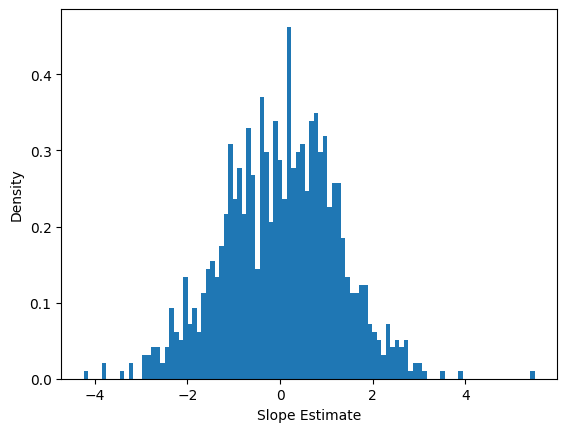

In [42]:
def estimate_slope(x, y):
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return beta[1]

beta_hist = []
for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 1.0 + 1.0 * np.random.randn(SAMPLE_SIZE)
    slope_estimate = estimate_slope(xlin, y)
    beta_hist.append(slope_estimate)

fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.set_xlabel('Slope Estimate')
ax.set_ylabel('Density')
plt.show()

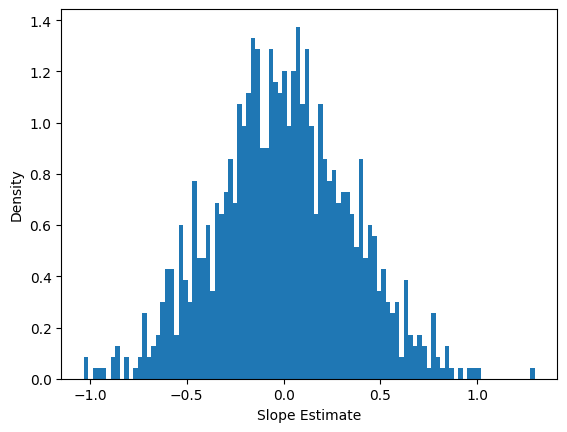

In [46]:
# Increasing the sample size
beta_hist = []
SAMPLE_SIZE = 100
for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 1.0 + 1.0 * np.random.randn(SAMPLE_SIZE)
    slope_estimate = estimate_slope(xlin, y)
    beta_hist.append(slope_estimate)

fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.set_xlabel('Slope Estimate')
ax.set_ylabel('Density')
plt.show()

After generating 1000 independent datasets, we estimate the slope for each dataset and then plots a histogram of the parameter estimates for the slope.

After increasing the SAMPLE_SIZE, the distribution has a smaller distribution of the slope estimates of the datasets. This is because more samples provide more data points to reduce the variance of the estimates. They also tend to approach a normal distribution as per the Central Limit Theorem.

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

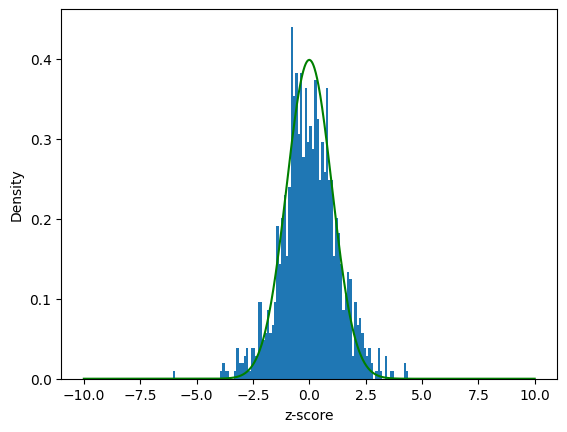

In [48]:
from scipy.stats import norm

beta_hist = []
SAMPLE_SIZE = 10
for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 1.0 + 1.0 * np.random.randn(SAMPLE_SIZE)
    slope_estimate = estimate_slope(xlin, y)
    beta_hist.append(slope_estimate)

# Calculate mean and standard deviation of beta_hist
beta_mean = np.mean(beta_hist)
beta_std = np.std(beta_hist)

# Calculate z-score for each beta estimate
z_scores = [(beta - beta_mean) / beta_std for beta in beta_hist]

xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, norm.pdf(xs, 0, 1), color='green')
ax.set_xlabel('z-score')
ax.set_ylabel('Density')
plt.show()

Calculated the of z-scores for each beta estimate, and then plotted the histogram of z-scores along with the standard normal pdf for comparison. This visualization helps to verify if the z-scores follow a standard normal distribution as expected.

e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

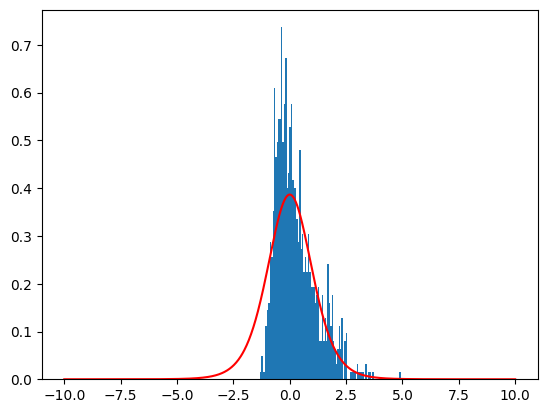

In [54]:
from scipy.stats import t

def standard_error(ytrue, ypred):
    residuals = ytrue - ypred
    rss = np.sum(residuals ** 2)
    return np.sqrt(rss / (len(ytrue) - 2))  # Using n - p = SAMPLE_SIZE - 2 for degrees of freedom

beta_hist = []
for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 1.0 + 1.0 * np.random.randn(SAMPLE_SIZE)
    slope_estimate = estimate_slope(xlin, y)
    beta_std_error = standard_error(y, 2.0 + slope_estimate * xlin)
    normalized_beta = slope_estimate / beta_std_error
    beta_hist.append(normalized_beta)

xs = np.linspace(-10,10,1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - 2), color='red')
plt.show()

The histogram of normalized beta values is then plotted along with the t-distribution with n-p degrees of freedom (SAMPLE_SIZE - 2 in this case) for comparison. This visualization helps verify if the normalized beta values follow a t-distribution.

f) You are given the following dataset:

[0.50155603 1.19902827]


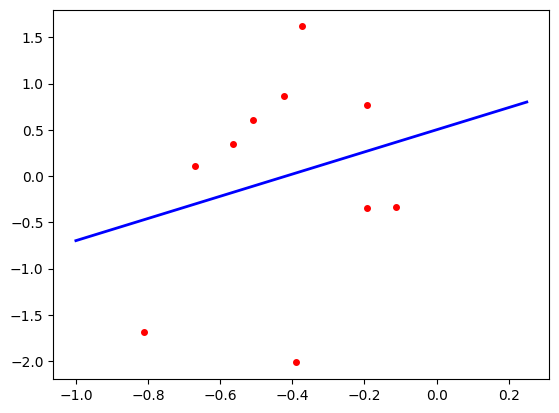

In [55]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [56]:
# Calculate standard error
residuals = y - X @ beta_hat
rss = np.sum(residuals ** 2)
standard_error = np.sqrt(rss / (len(y) - 2))

# Calculate t-statistic
t_statistic = beta_hat[1] / standard_error

# Calculate p-value
p_value = t.sf(np.abs(t_statistic), len(y) - 2) * 2  # Two-tailed test

print("Beta hat:", beta_hat)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

Beta hat: [0.50155603 1.19902827]
T-statistic: 1.024860074392767
P-value: 0.335417218459404


Here, the p-value represents the probability of observing a dataset as extreme as the given one, assuming that the true slope is 0. A small p-value suggests that the observed dataset is unlikely to occur under the assumption of $\beta = 0$, indicating evidence against the null hypothesis of no relationship.